In [ ]:
!pip install catboost

In [16]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier


In [3]:
# Question 6: Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy.

from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Separate features (X) and target variable (y)
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state for reproducibility

# Initialize an AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42) # Using random_state for reproducibility

# Train the AdaBoost Classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_clf.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


AdaBoost Classifier Accuracy: 0.9737


In [7]:
# Question 7:  Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score.


from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data  # Features
y = california_housing.target  # Target variable (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2:.4f}")


R-squared score: 0.7756


In [11]:
# Question 8: Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy.


from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Define the parameter grid for GridSearchCV, focusing on learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform the grid search to tune the learning rate
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'learning_rate': 0.2}
Best cross-validation accuracy: 0.9670
Test set accuracy with best parameters: 0.9561


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


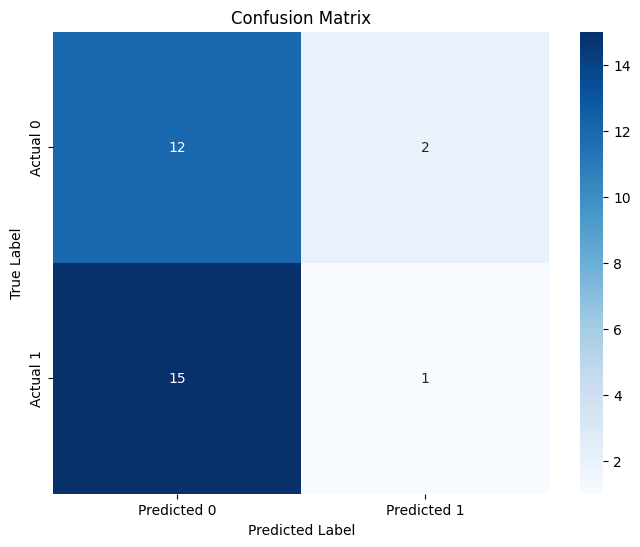

In [17]:
# Question 9: Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn.


# 1. Generate synthetic data for demonstration
# In a real-world scenario, you would load your dataset here.
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100) # Binary target variable

# Convert to Pandas DataFrame (optional, but good practice for CatBoost)
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y_series = pd.Series(y, name='target')

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.3, random_state=42)

# 3. Train a CatBoost Classifier
# You can customize CatBoost parameters as needed
model = CatBoostClassifier(iterations=100,  # Number of boosting iterations
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss', # For binary classification
                           random_seed=42,
                           verbose=0) # Suppress verbose output during training

model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
# The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:
# ● Data preprocessing & handling missing/categorical values
# ● Choice between AdaBoost, XGBoost, or CatBoost
# ● Hyperparameter tuning strategy
# ● Evaluation metrics you'd choose and why
# ● How the business would benefit from your model


